## For Dataset data_3_1_1.csv

In [ ]:
# load data
import numpy as np
import pandas as pd

data = pd.read_csv('D:\Machine Learning TP year 3 s2\data_3_1_1.csv')
data.head()

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1


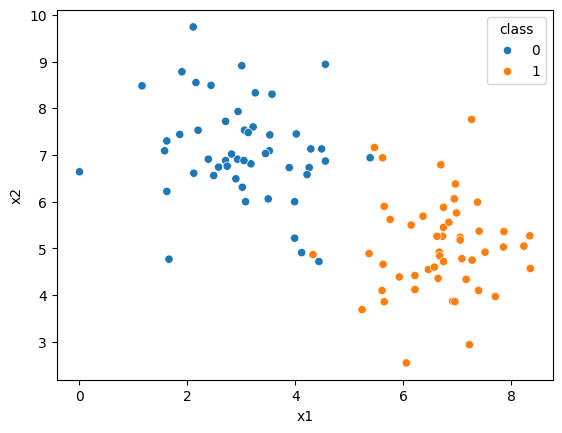

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x=data['x1'], y=data['x2'], hue=data['class'])
plt.show()

In [ ]:
import torch
import torch.nn as nn

# separate X and y
data_arr = data.to_numpy()
X = data_arr[:, :-1]
y = data_arr[:, -1]

# scale X
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# convert array to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
# build model
def my_model(X, w1, b1, w2, b2, w3, b3):
  # layer 1
  z1 = torch.matmul(X, w1) + b1
  a1 = torch.sigmoid(z1)

  # layer 2
  z2 = torch.matmul(a1, w2) + b2
  a2 = torch.sigmoid(z2)

  # output layer
  z3 = torch.matmul(a2, w3) + b3
  output = torch.sigmoid(z3)

  return output

In [ ]:
# training

# initialize parameters
w1 = torch.randn((2, 5), requires_grad=True) # 10 parameters
b1 = torch.randn((1, 5), requires_grad=True) # 5 parameters
w2 = torch.randn((5, 5), requires_grad=True) # 25 parameters
b2 = torch.randn((1, 5), requires_grad=True) # 5 parameters
w3 = torch.randn((5, 1), requires_grad=True) # 5 parameters
b3 = torch.randn((1, 1), requires_grad=True)	# 1 parameters

cost_function = nn.BCELoss()
lr = 1
epochs = 1000

for epoch in range(epochs):
  # forward pass
  output = my_model(X_tensor, w1, b1, w2, b2, w3, b3)

  # compute cost
  cost = cost_function(output, y_tensor.reshape(-1, 1))

  # computer derivates
  cost.backward()

  # update parameters
  with torch.no_grad():
    w1 -= lr * w1.grad
    b1 -= lr * b1.grad
    w2 -= lr * w2.grad
    b2 -= lr * b2.grad
    w3 -= lr * w3.grad
    b3 -= lr * b3.grad

    # zero derivates
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()
    w3.grad.zero_()
    b3.grad.zero_()

  print(f'Epoch {epoch+1:03d}: Cost {cost.item():.4f}')

Epoch 001: Cost 1.1078
Epoch 002: Cost 0.7612
Epoch 003: Cost 0.6185
Epoch 004: Cost 0.5708
Epoch 005: Cost 0.5477
Epoch 006: Cost 0.5291
Epoch 007: Cost 0.5111
Epoch 008: Cost 0.4931
Epoch 009: Cost 0.4750
Epoch 010: Cost 0.4572
Epoch 011: Cost 0.4395
Epoch 012: Cost 0.4222
Epoch 013: Cost 0.4053
Epoch 014: Cost 0.3889
Epoch 015: Cost 0.3730
Epoch 016: Cost 0.3577
Epoch 017: Cost 0.3429
Epoch 018: Cost 0.3288
Epoch 019: Cost 0.3153
Epoch 020: Cost 0.3025
Epoch 021: Cost 0.2903
Epoch 022: Cost 0.2787
Epoch 023: Cost 0.2678
Epoch 024: Cost 0.2575
Epoch 025: Cost 0.2478
Epoch 026: Cost 0.2386
Epoch 027: Cost 0.2300
Epoch 028: Cost 0.2219
Epoch 029: Cost 0.2143
Epoch 030: Cost 0.2071
Epoch 031: Cost 0.2004
Epoch 032: Cost 0.1940
Epoch 033: Cost 0.1881
Epoch 034: Cost 0.1824
Epoch 035: Cost 0.1771
Epoch 036: Cost 0.1721
Epoch 037: Cost 0.1673
Epoch 038: Cost 0.1629
Epoch 039: Cost 0.1586
Epoch 040: Cost 0.1546
Epoch 041: Cost 0.1507
Epoch 042: Cost 0.1471
Epoch 043: Cost 0.1436
Epoch 044: 

In [ ]:
# evaluate the model
output = my_model(X_tensor, w1, b1, w2, b2, w3, b3)
output[output >= 0.5] = 1
output[output < 0.5] = 0

accuracy = output == y_tensor.reshape(-1, 1)
print(f'Accuracy: {accuracy.sum().item() / len(accuracy):.2f} %')

Accuracy: 0.97 %
